### Importation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## Importation des données

In [3]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")  # pour la soumission Kaggle

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (42000, 785)
Test shape: (28000, 784)


## Séparation X / y

In [4]:
y = train_df["label"].values
X = train_df.drop(columns=["label"]).values

# Reshape en images 28x28 pour DL
X_img = X.reshape(-1, 28, 28)

## Visualisation

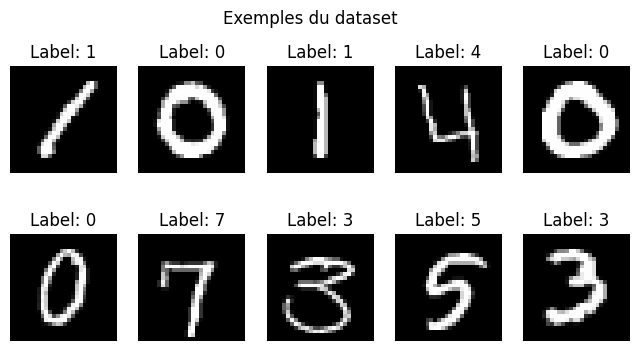

In [5]:
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_img[i], cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.suptitle("Exemples du dataset")
plt.show()

## Distribution

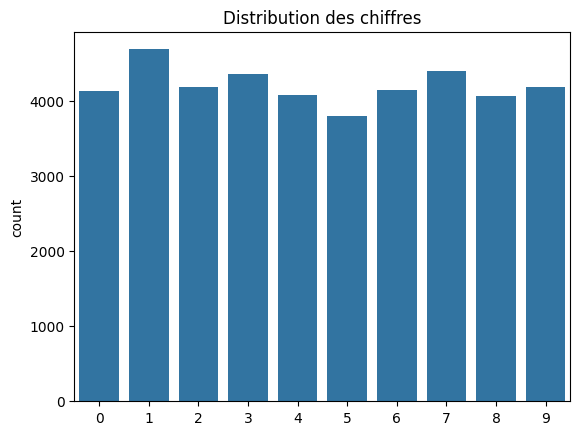

In [6]:
sns.countplot(x=y)
plt.title("Distribution des chiffres")
plt.show()

## Normalisation

In [7]:
X_norm = (X / 255.0).astype("float32")
X_img_norm = (X_img / 255.0).astype("float32")

## Split train / val

In [8]:
X_train, X_val, y_train, y_val = train_test_split(
    X_norm, y, test_size=0.1, stratify=y, random_state=42
)

X_train_img, X_val_img, _, _ = train_test_split(
    X_img_norm, y, test_size=0.1, stratify=y, random_state=42
)

print("Train ML:", X_train.shape)
print("Train DL:", X_train_img.shape)

Train ML: (37800, 784)
Train DL: (37800, 28, 28)


## Sauvegarde des modèles

In [14]:


# Version Machine Learning (DataFrame aplatie)
pd.DataFrame(X_train).to_pickle("../data/X_train.pkl")
pd.DataFrame(X_val).to_pickle("../data/X_val.pkl")
pd.DataFrame(y_train, columns=["label"]).to_pickle("../data/y_train.pkl")
pd.DataFrame(y_val, columns=["label"]).to_pickle("../data/y_val.pkl")

# Version Deep Learning (Numpy arrays)
np.save("../data/X_train_img.npy", X_train_img)   # shape (N, 28, 28)
np.save("../data/X_val_img.npy", X_val_img)
np.save("../data/y_train.npy", y_train)
np.save("../data/y_val.npy", y_val)

# Sauvegarde du test set pour soumission
test_img = test_df.values.reshape(-1, 28, 28) / 255.0
np.save("../data/test_img.npy", test_img)
pd.DataFrame(test_df).to_pickle("../data/test.pkl")

print("✅ Données sauvegardées dans ../data (format .pkl et .npy, pas de Parquet).")


✅ Données sauvegardées dans ../data (format .pkl et .npy, pas de Parquet).
